<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
# First task
from js import fetch
import io
import pandas as pd

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

async def load_data():
    resp = await fetch(URL)
    boston_data = io.BytesIO((await resp.arrayBuffer()).to_py())
    return pd.read_csv(boston_data)

boston_df = await load_data()

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


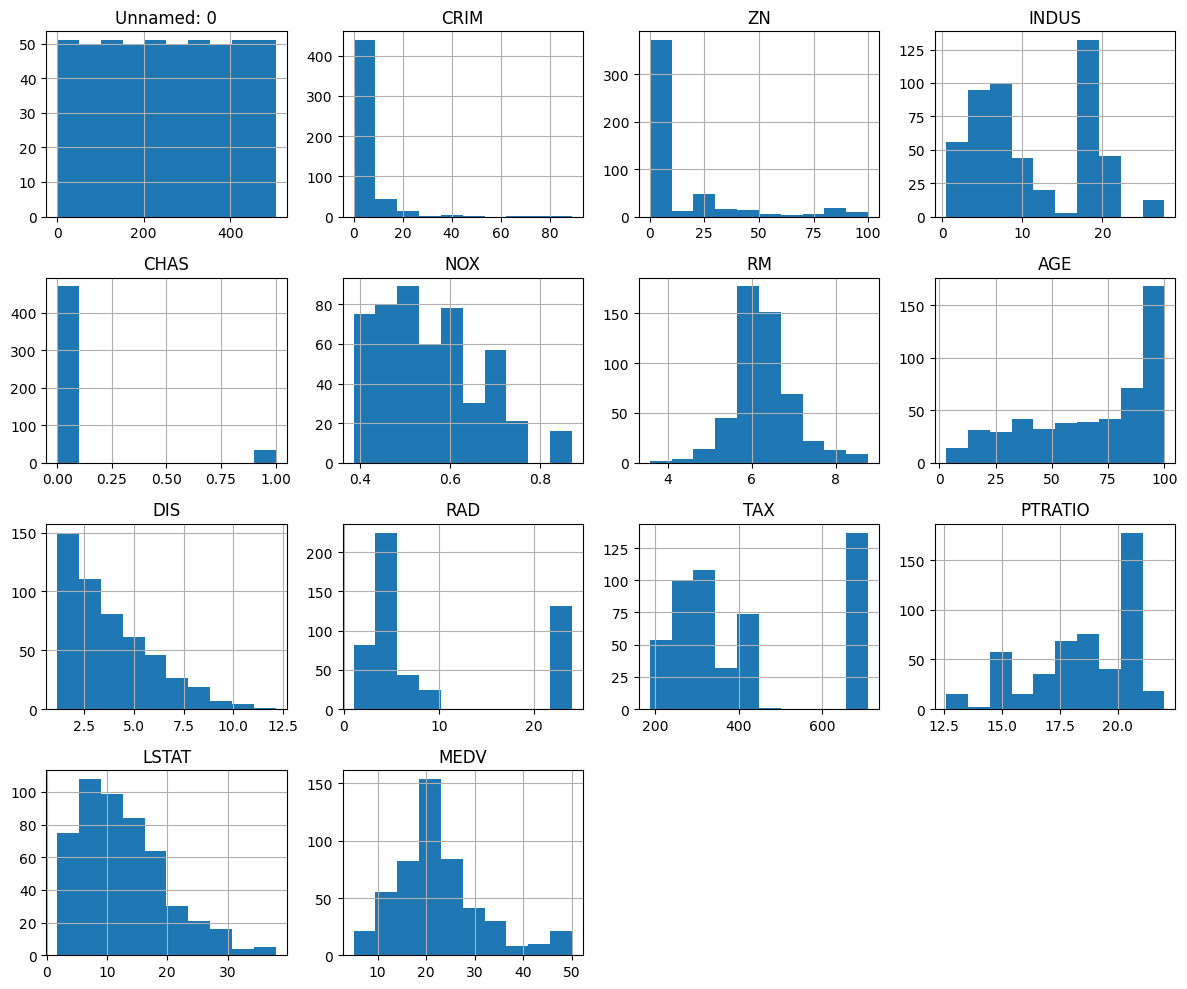

In [4]:
# Basic inspection
boston_df.info()
boston_df.describe()

# Visualization
import matplotlib.pyplot as plt
boston_df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [11]:
# For JupyterLite/restricted environments:
import piplite
await piplite.install('seaborn')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

print("Seaborn installed and imported successfully! ✅")

Seaborn installed and imported successfully! ✅


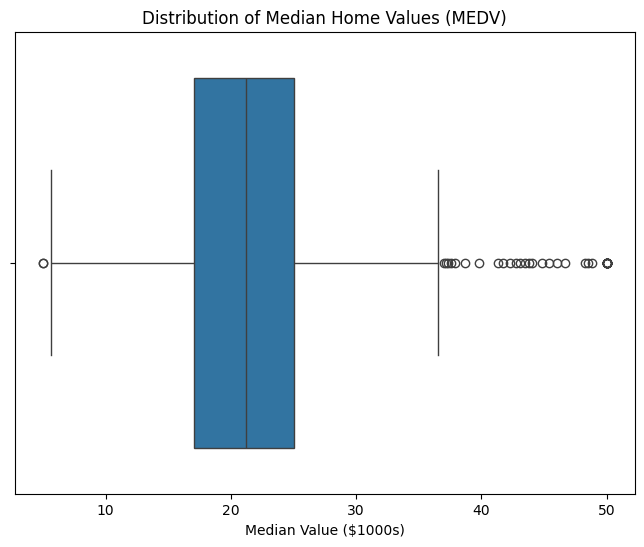

In [15]:
# Second Task
%matplotlib inline

# --- 1. Boxplot for MEDV ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])  # Fixed: 'sns' instead of 'sms'/'bottom_df'
plt.title('Distribution of Median Home Values (MEDV)')
plt.xlabel('Median Value ($1000s)')
plt.show()

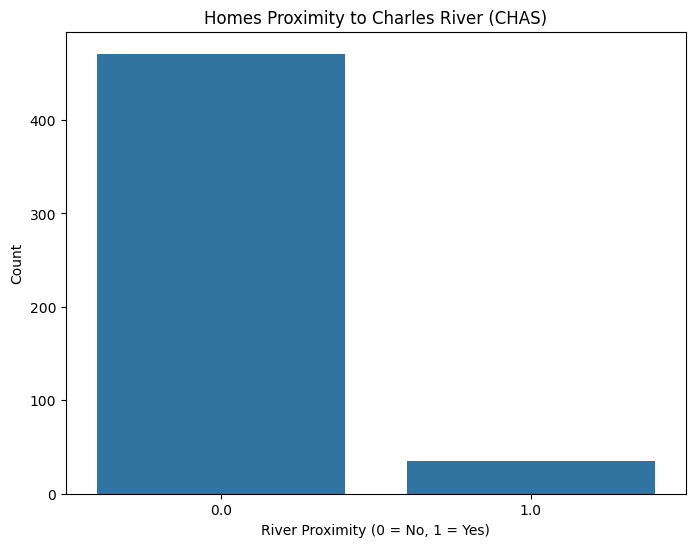

In [16]:
# --- 2. Bar Plot for CHAS ---
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)  # Corrected dataframe name
plt.title('Homes Proximity to Charles River (CHAS)')
plt.xlabel('River Proximity (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

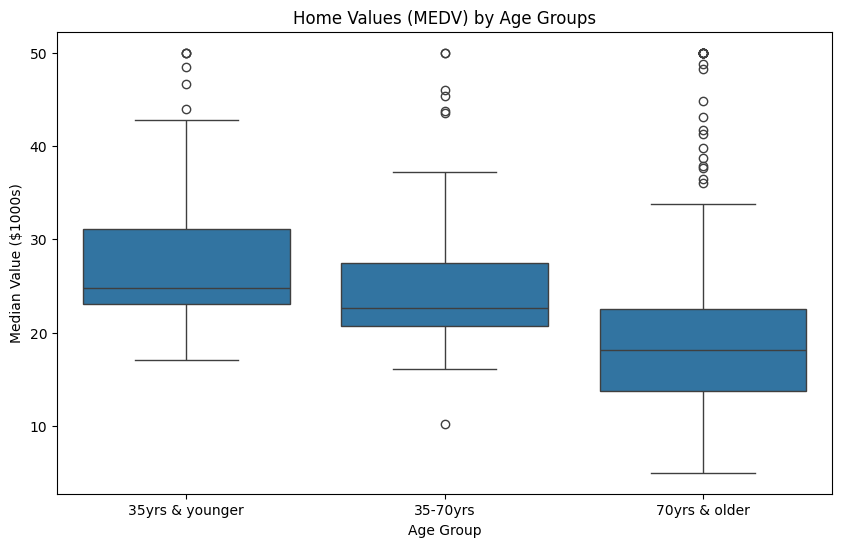

In [17]:
# --- 3. Boxplot: MEDV vs. AGE Groups ---
# Discretize AGE into 3 groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['35yrs & younger', '35-70yrs', '70yrs & older'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Home Values (MEDV) by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()


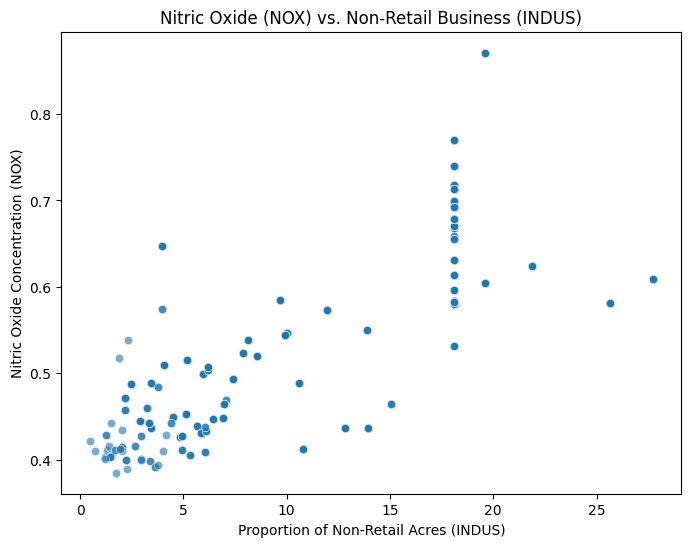

In [18]:
# --- 4. Scatter Plot: NOX vs. INDUS ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.6)
plt.title('Nitric Oxide (NOX) vs. Non-Retail Business (INDUS)')
plt.xlabel('Proportion of Non-Retail Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

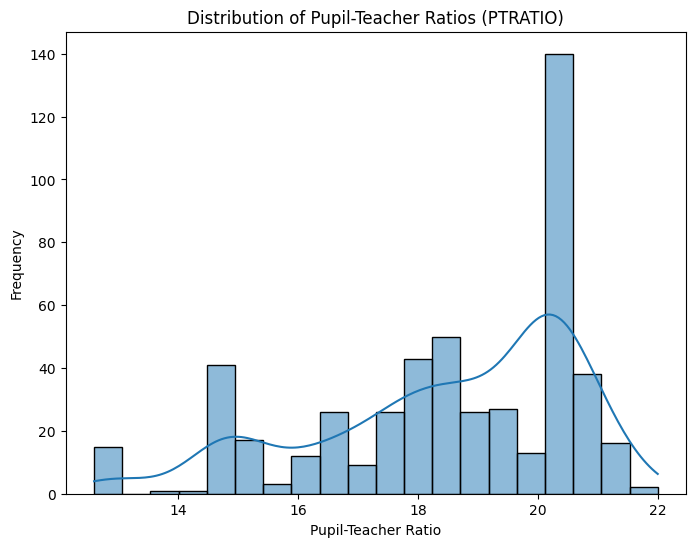

In [19]:
# --- 5. Histogram for PTRATIO ---
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Distribution of Pupil-Teacher Ratios (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [21]:
# task third

from scipy.stats import ttest_ind

# Split data into two groups
group_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(group_river, group_no_river)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Significant difference in MEDV based on river proximity.")
else:
    print("Fail to reject H0: No significant difference.")

T-statistic: 3.996, P-value: 0.000
Reject H0: Significant difference in MEDV based on river proximity.


In [22]:
from scipy.stats import f_oneway

# Discretize AGE into 3 groups
group_young = boston_df[boston_df['AGE_GROUP'] == '35yrs & younger']['MEDV']
group_mid = boston_df[boston_df['AGE_GROUP'] == '35-70yrs']['MEDV']
group_old = boston_df[boston_df['AGE_GROUP'] == '70yrs & older']['MEDV']

# Perform ANOVA
f_stat, p_value = f_oneway(group_young, group_mid, group_old)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")

# Conclusion
if p_value < alpha:
    print("Reject H0: Significant difference in MEDV across age groups.")
else:
    print("Fail to reject H0: No significant difference.")

F-statistic: 36.408, P-value: 0.000
Reject H0: Significant difference in MEDV across age groups.


In [23]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation Coefficient: {corr:.3f}, P-value: {p_value:.3f}")

# Conclusion
if p_value < alpha:
    print("Reject H0: Significant correlation between NOX and INDUS.")
else:
    print("Fail to reject H0: No significant correlation.")

Correlation Coefficient: 0.764, P-value: 0.000
Reject H0: Significant correlation between NOX and INDUS.


In [24]:
import statsmodels.api as sm

# Define variables (add constant for intercept)
X = sm.add_constant(boston_df['DIS'])  # Predictor
y = boston_df['MEDV']                 # Target

# Fit regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Extract p-value for DIS
p_value = model.pvalues[1]
print(f"\nP-value for DIS: {p_value:.3f}")

# Conclusion
if p_value < alpha:
    print("Reject H0: DIS significantly impacts MEDV.")
else:
    print("Fail to reject H0: No significant impact.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        11:09:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<ipython-input-24-3c63a4e7d087>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]



P-value for DIS: 0.000
Reject H0: DIS significantly impacts MEDV.
